In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

(280, 336, 311)
0.0464608659580173
(26, 45, 20)
0.04645305681961748
(26, 45, 20)


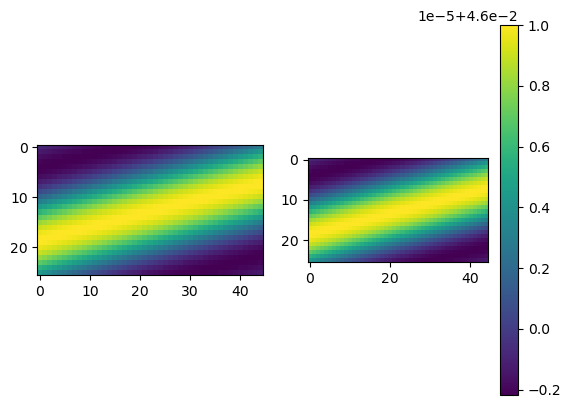

In [2]:
B0_Tom_3D = np.load('Tom-B0.npy')
"""
250/51 = 4.90196078431, 300/51 = 5.88235294118, 275/51 = 5.39215686275
"""
B0_3D = B0_Tom_3D
B0_3D= np.nan_to_num(B0_3D)
B0_3D = zoom(B0_3D, (5.5, 6.58, 6.1), order=0)
B0_3D = np.divide(B0_3D,1000)

print(B0_3D.shape)
print(np.max(B0_3D))

#np.save('Test_Big_b0', B0_3D)

B0_Tom_3D = np.load('Tom-B0.npy')
"""
250/51 = 4.90196078431, 300/51 = 5.88235294118, 275/51 = 5.39215686275
"""
B0_3D = B0_Tom_3D
B0_3D= np.nan_to_num(B0_3D)
B0_3D = zoom(B0_3D, (0.5, 0.88, 0.39), order=0)
B0_3D = np.divide(B0_3D,1000)

print(B0_3D.shape)
print(np.max(B0_3D))

#np.save('Test_Small_b0', B0_3D)

t = np.zeros((B0_3D.shape))
s = t.shape

for x in range(s[0]):
    for y in range(s[1]):
        for z in range(s[2]):
            t[x,y,z] = np.sinc((x*x + y*y + z*z)**0.5)

t = t*0.00008
#np.save('Test_Sinc_b0', ttt)

t = np.zeros((B0_3D.shape))
s = t.shape

for x in range(s[0]):
    for y in range(s[1]):
        for z in range(s[2]):
            a = x - s[0]//2
            b = y - s[1]//2
            c = z - s[2]//2
            t[x,y,z] = 0.046 + 0.00001*(np.sinc((a*2 + b*0.5 + c*c)*0.05))

s = t.shape
print(s)
plt.subplot(121)
plt.imshow(t[:,:,s[2]//2])
plt.subplot(122)
plt.imshow(t[:,:,s[2]//2])
plt.colorbar()
plt.show()

(280, 336, 311)


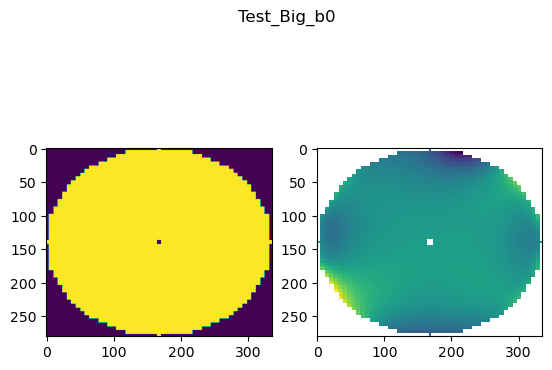

(26, 45, 20)


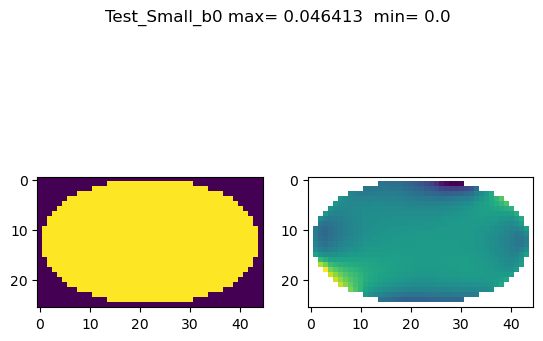

(26, 45, 20)


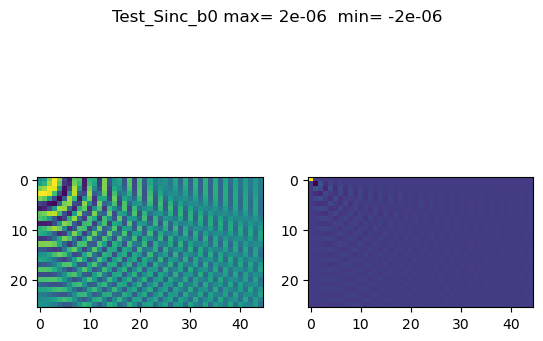

(26, 45, 20)


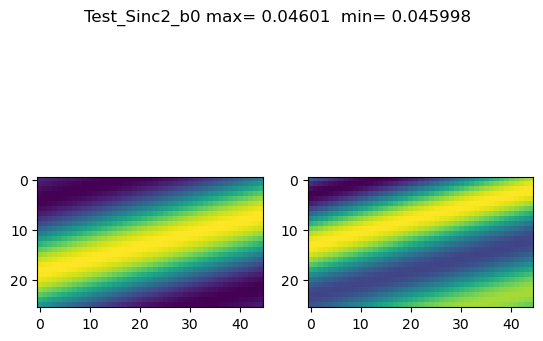

(26, 45, 20)


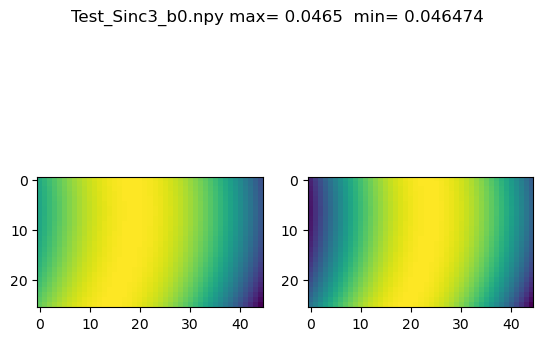

(26, 45, 20)


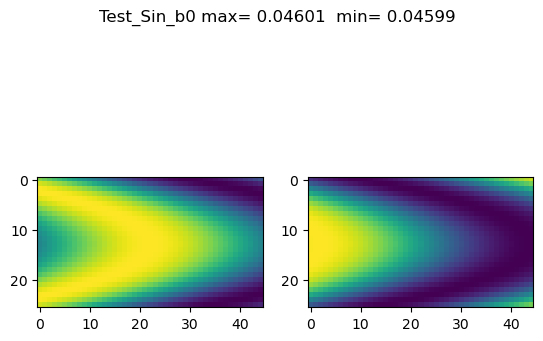

(150, 356, 232)


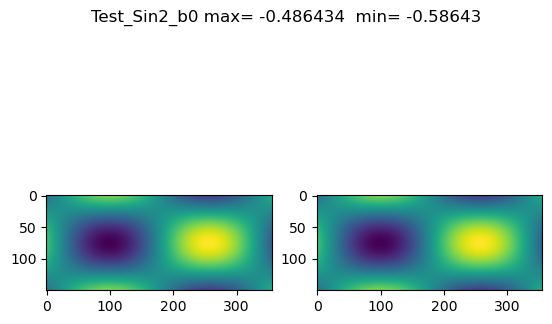

In [6]:
t = np.load('Test_Big_b0.npy')
tt = np.copy(t)
tt[tt == 0] = np.nan
s = t.shape
print(s)
plt.subplot(1,2,1)
plt.suptitle('Test_Big_b0')
plt.imshow(t[:,:,s[2]//2])
plt.subplot(1,2,2)
plt.imshow(tt[:,:,s[2]//2])
plt.show()

t = np.load('Test_Small_b0.npy')
tt = np.copy(t)
tt[tt == 0] = np.nan
s = t.shape
print(s)
plt.subplot(121)
plt.suptitle('Test_Small_b0 max= ' + str(np.round(np.max(t[:,:,s[2]//2]),6)) + '  min= ' + str(np.round(np.min(t[:,:,s[2]//2]),6)))
plt.imshow(t[:,:,s[2]//2])
plt.subplot(122)
plt.imshow(tt[:,:,s[2]//2])
plt.show()

t = np.load('Test_Sinc_b0.npy')
print(t.shape)
plt.subplot(121)
plt.suptitle('Test_Sinc_b0 max= ' + str(np.round(np.max(t[:,:,s[2]//2]),6)) + '  min= ' + str(np.round(np.min(t[:,:,s[2]//2]),6)))
plt.imshow(t[:,:,s[2]//2])
plt.subplot(122)
plt.imshow(t[:,:,0])
plt.show()

t = np.load('Test_Sinc2_b0.npy')
print(t.shape)
plt.subplot(121)
plt.imshow(t[:,:,s[2]//2])
plt.suptitle('Test_Sinc2_b0 max= ' + str(np.round(np.max(t[:,:,s[2]//2]),6)) + '  min= ' + str(np.round(np.min(t[:,:,s[2]//2]),6)))
plt.subplot(122)
plt.imshow(t[:,:,0])
plt.show()

t = np.load('Test_Sinc3_b0.npy')
print(t.shape)
plt.subplot(121)
plt.imshow(t[:,:,s[2]//2])
plt.suptitle('Test_Sinc3_b0.npy max= ' + str(np.round(np.max(t[:,:,s[2]//2]),6)) + '  min= ' + str(np.round(np.min(t[:,:,s[2]//2]),6)))
plt.subplot(122)
plt.imshow(t[:,:,0])
plt.show()

t = np.load('Test_Sin_b0.npy')
print(t.shape)
plt.subplot(121)
plt.imshow(t[:,:,s[2]//2])
plt.suptitle('Test_Sin_b0 max= ' + str(np.round(np.max(t[:,:,s[2]//2]),6)) + '  min= ' + str(np.round(np.min(t[:,:,s[2]//2]),6)))
plt.subplot(122)
plt.imshow(t[:,:,0])
plt.show()

t = np.load('Test_Sin2_b0.npy')
print(t.shape)
plt.subplot(121)
plt.suptitle('Test_Sin2_b0 max= ' + str(np.round(np.max(t[:,:,s[2]//2]),6)) + '  min= ' + str(np.round(np.min(t[:,:,s[2]//2]),6)))
plt.imshow(t[:,:,s[2]//2])
plt.subplot(122)
plt.imshow(t[:,:,0])
plt.show()

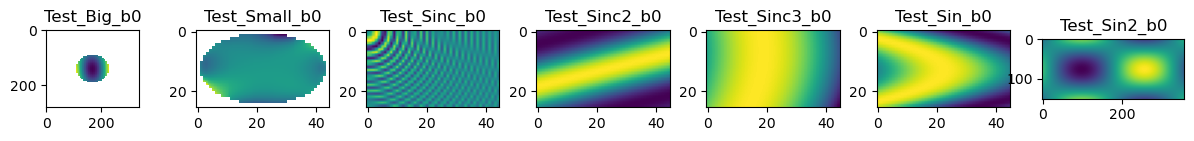

In [34]:
t = np.load('Test_Big_b0.npy')
t[t == 0] = np.nan
t2 = np.load('Test_Small_b0.npy')
t2[t2 == 0] = np.nan
t3 = np.load('Test_Sinc_b0.npy')
t4 = np.load('Test_Sinc2_b0.npy')
t5 = np.load('Test_Sinc3_b0.npy')
t6 = np.load('Test_Sin_b0.npy')
t7 = np.load('Test_Sin2_b0.npy')

fig, axs = plt.subplots(1,7,figsize=(15, 1))
axs[0].set_title('Test_Big_b0')
axs[0].imshow(t[:,:,s[2]//2])
axs[1].set_title('Test_Small_b0')
axs[1].imshow(t2[:,:,s[2]//2])
axs[2].set_title('Test_Sinc_b0')
axs[2].imshow(t3[:,:,s[2]//2])
axs[3].set_title('Test_Sinc2_b0')
axs[3].imshow(t4[:,:,s[2]//2])
axs[4].set_title('Test_Sinc3_b0')
axs[4].imshow(t5[:,:,s[2]//2])
axs[5].set_title('Test_Sin_b0')
axs[5].imshow(t6[:,:,s[2]//2])
axs[6].set_title('Test_Sin2_b0')
axs[6].imshow(t7[:,:,s[2]//2])
plt.show()
